## 什么是kNN算法
邻近算法，或者说K最近邻(kNN，k-NearestNeighbor)分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是k个最近的邻居的意思，说的是每个样本都可以用它最接近的k个邻居来代表。
kNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 kNN方法在类别决策时，只与极少量的相邻样本有关。由于kNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，kNN方法较其他方法更为适合。

## 相关数学知识
* 两点间距离计算公式：

In [2]:
import math
a = (1, 2)
b = (3, 4)
dist = math.sqrt(pow(a[0] - b[0], 2) + pow(a[0], b[0]))
print(dist)

2.23606797749979


## 环境准备
* Mac OS 10.13
* Python 3.6.5
* jupyter notebook
* 安装numpy
* 安装scipy
* 安装matplotlib
* 安装opencv-python
* 安装ipython
* 安装jupyter
```
pip install numpy
pip install scipy
pip install matplotlib
pip install opencv-python
pip install ipython
pip install jupyter
```

## Source Code

result:  [[1.]]
neighbours:  [[1. 0. 1.]]
distance:  [[ 13. 130. 205.]]


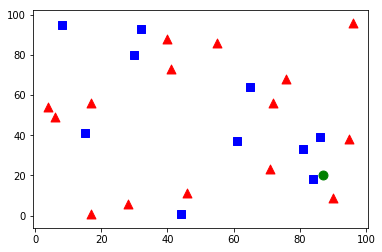

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

train_data = np.random.randint(0, 100, (25, 2)).astype(np.float32)

responses = np.random.randint(0, 2, (25, 1)).astype(np.float32)

red = train_data[responses.ravel() == 0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

blue = train_data[responses.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

# plt.show()

newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'o')

knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, responses)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

print("result: ", results)
print("neighbours: ", neighbours)
print("distance: ", dist)

## 代码解释
* 生成待训练的数据和标签
```python
train_data = np.random.randint(0, 100, (25, 2)).astype(np.float32)

responses = np.random.randint(0, 2, (25, 1)).astype(np.float32)
```
* 在图中标记红色样本
```python
red = train_data[responses.ravel() == 0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')
```
* 在图中标记蓝色样本
```python
blue = train_data[responses.ravel() == 1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')
```
* 产生待分类数据
```python
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, 'g', 'o')
```
* 训练样本并产生分类
```python
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, responses)
```
* 给新数据分类：K设置为5
```python
ret, results, neighbours, dist = knn.findNearest(newcomer, 5)
```

## Referer
1. [Understanding k-Nearest Neighbour][4]
2. [wikipedia: k-nearest neighbors algorithm][5]
3. [kNN(K-Nearest Neighbor)最邻近规则分类][6]

[1]: https://segmentfault.com/a/1190000007715243
[2]: http://www.numpy.org/
[3]: http://matplotlib.org/
[4]: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_knn/py_knn_understanding/py_knn_understanding.html
[5]: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
[6]: http://blog.csdn.net/xlm289348/article/details/8876353